In [46]:
import pandas as pd
from pathlib import Path
import re
from nltk.tokenize import word_tokenize
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

PATH_TO_FILES=Path('C:\Datalab\sida_projekt\sida_projekt\Riksdagsdata\Propositioner')
PATH_TO_OUTDATA=Path('data')

# Skippa dokument med titlar som innehåller:
FILTER_TITLE='vårproposition|budgetproposition|ändringsbudget' # Lämna tom sträng om du inte vill filtrera

df1=pd.read_csv(PATH_TO_FILES / 'prop-2018-2021.csv',header=None)
df2=pd.read_csv(PATH_TO_FILES /'prop-2014-2017.csv',header=None)
df=pd.concat([df1,df2])
df.loc[:,1]=df.loc[:,1].str.lower()
df.set_index(1, inplace=True)
df.index.rename('filename', inplace=True)
df.to_pickle(PATH_TO_OUTDATA / 'df_rm14_21.pkl') # Save
#df.to_feather(PATH_TO_OUTDATA / 'df_rm18_21.ftr') # Save
df=df.rename(columns={2:'rm',8:'Departement',9:'Utskott',13:'Titel'})
df.head()

0       rm    3     4     5     6    7  \
filename                                                 
h6031     5009056  2018/19    1  prop  prop  prop  NaN   
h60310    5008522  2018/19   10  prop   skr  prop  NaN   
h603100   5030845  2018/19  100  prop  prop  prop  NaN   
h603101   5031498  2018/19  101  prop   skr  prop  NaN   
h603102   5031110  2018/19  102  prop  prop  prop  NaN   

                          Departement Utskott   10                   11  \
filename                                                                  
h6031             Finansdepartementet     FiU    1  2018-11-15 00:00:00   
h60310    Arbetsmarknadsdepartementet      AU   10  2018-11-07 00:00:00   
h603100           Finansdepartementet     FiU  100  2019-04-10 00:00:00   
h603101           Finansdepartementet     FiU  101  2019-04-15 00:00:00   
h603102           Socialdepartementet     SoU  102  2019-04-11 00:00:00   

                           12  \
filename                        
h6031     2021-02-12 10:56:44   
h60310    2019-02-28 16:30:18   
h603100   2019-10-07 12:28:34   
h603101   2019-04-24 14:42:51   
h603102   2019-06-19 15:23:27   

                                                      Titel   14        15  \
filename                                                                     
h6031                          Budgetpropositionen för 2019  NaN      Klar   
h60310    Riksrevisionens rapport om deltagarantal i nya...  NaN  Hänvisad   
h603100                  2019 års ekonomiska vårproposition  NaN      Klar   
h603101                      Årsredovisning för staten 2018  NaN  Hänvisad   
h603102   Omedelbart omhändertagande av barn i vissa int...  NaN      Klar   

           16  
filename       
h6031     NaN  
h60310    NaN  
h603100   NaN  
h603101   NaN  
h603102   NaN

In [61]:

exclude=(df.loc[df['Titel'].str.contains(FILTER_TITLE,flags=re.I)].index).to_list() # Remove docs with filter_title
print('Exkluderade dokument:',len(exclude))
print('Exempel på dokument som',exclude[:10],'...')



Exkluderade dokument: 187
Exempel på dokument som ['h6031', 'h603100', 'h6032', 'h60346', 'h60373', 'h60399', 'h7031', 'h703100', 'h703132', 'h703136'] ...


In [63]:
pathlist=list(PATH_TO_FILES.glob('*.txt'))
print('Dokument i ofilterard lista',len(pathlist))

if FILTER_TITLE!='':
    print('Exkluderar',len(exclude), 'dokument')
    # Exclude filenames
    pathlist=[path for path in pathlist if path.stem.lower() not in exclude]

print('Dokument i filterard lista',len(pathlist))

pathlist[:5]

Dokument i ofilterard lista 1902
Exkluderar 187 dokument
Dokument i filterard lista 1715


[WindowsPath('C:/Datalab/sida_projekt/sida_projekt/Riksdagsdata/Propositioner/H20310.txt'),
 WindowsPath('C:/Datalab/sida_projekt/sida_projekt/Riksdagsdata/Propositioner/h203101.txt'),
 WindowsPath('C:/Datalab/sida_projekt/sida_projekt/Riksdagsdata/Propositioner/h203102.txt'),
 WindowsPath('C:/Datalab/sida_projekt/sida_projekt/Riksdagsdata/Propositioner/h203103.txt'),
 WindowsPath('C:/Datalab/sida_projekt/sida_projekt/Riksdagsdata/Propositioner/h203104.txt')]

In [59]:
with open(pathlist[40],'r', encoding='utf-8') as file:
    #text=" ".join(file.readlines())
    text=file.read()

In [60]:
split_pattern='\n\s+' # Kan hantera konstiga mönster
text_para=re.split(split_pattern,text)
print('Längd på listan (stycken):',len(text_para))

# Kontrollera hur det fungerade
for para in text_para[:20]:
    print('Tokens:',len(word_tokenize(para,"swedish")),'\t ->  ',para)

Längd på listan: 3218
Tokens: 3 	 -> ﻿Regeringens skrivelse 2014/15:132
Tokens: 6 	 -> Redovisning av fördelning av medel från
Tokens: 2 	 -> Skr.
Tokens: 5 	 -> Allmänna arvsfonden under budgetåret 2014
Tokens: 1 	 -> 2014/15:132
Tokens: 91 	 -> Regeringen överlämnar denna skrivelse till riksdagen.
Stockholm den 25 juni 2015
Margot Wallström
Åsa Regnér
(Socialdepartementet)
Skrivelsens huvudsakliga innehåll
I denna skrivelse lämnas en redogörelse för förvaltningen av Allmänna arvsfonden och en redovisning av hur Arvsfondsdelegationen fördelat medel under 2014. Vidare redogör regeringen för sin bedömning av Arvsfondsdelegationens utveckling och verksamhet samt analyserar fördelningen av stöd inom de olika verksamhetsområdena. I skrivelsen anges också områden som enligt regeringens mening bör prioriteras vid kommande fördelning av stöd ur Allmänna arvsfonden.
1
Skr. 2014/15:132
2
Innehållsförteckning
Tokens: 1 	 -> 1
Tokens: 3 	 -> Allmänna arvsfonden ...................................

In [87]:
# Kontrollera distributionen
dist_para=[]
for para in text_para:
    dist_para.append(len(word_tokenize(para,"swedish")))
df=pd.DataFrame({'tokens':dist_para,'text':text_para})
df=df.loc[df.tokens>1,:]
df.describe()
# Max 768 tokens!
# Det här ser inte bra ut. De färdiga textfilerna från Riksdagens öppna data är sämst...

tokens
count  1789.000000
mean     12.577418
std      64.979744
min       2.000000
25%       2.000000
50%       3.000000
75%       4.000000
max    1824.000000

In [88]:
df.nlargest(5,columns='tokens')

tokens                                               text
1262    1824  ningen, har fler handläggare anställts. Kommun...
1094     770  Skr. 2014/15:132 \nProjekt som syftar till öka...
1304     660  Regeringen väljer att prioritera ytterligare f...
1172     587  be- viljats projektmedel inom området kultur f...
1141     579  Organisationer och föreningar som beviljas stö...

In [84]:
print(df.at[1262,'text'])

ningen, har fler handläggare anställts. Kommunikationsinsatserna har också förstärkts och effektiviserats för att öka andelen ansökningar som leder till bifall. En utvärderingsverksamhet har dessutom byggts upp och etablerats.
En ny webbplats lanserades under 2014 och ett nytt dia- rium/ärendehanteringssystem är under fortsatt utveckling. Utvecklingen av det nya ärendehanteringssystemet har dock förskjutits i tiden och kommer att indelas i två faser. Den första delen består av ett nytt diarie- föringssystem, som beräknas börja användas under 2015. Den andra delen kommer att utvecklas och börja användas under kommande år.
Driftskostnaderna i förhållande till beslutade projektmedel ligger 2014 på den lägsta nivån de senaste fem åren, vilket är strax över 5 procent. Det beror främst på att utdelade projektmedel ökat betydligt de senaste fem åren. Kostnaderna per beslutad ansökan är också lägre än 2013 och 2012. Det beror på att det sammanlagda antalet beslut har ökat med 8 procent jämfört

In [125]:
with open(pathlist[40],'r', encoding='utf-8') as file:
    #text=" ".join(file.readlines())
    text_all=file.read()

In [271]:
def add_space(text):
    """ Adds space before (suspected) chapter"""
    return re.sub('\.\s*(\n[A-Ö\d][\.]?\w*:?( [\w\-–:]*){0,7}\s*?\n+)[A-Ö]',r'\n\1',text)

def remove_chapnumber(text):
    """Remove chapter number
    Returns cleaned text"""
    return re.sub('\n\d+\.\d+\n|\n\d+\n','',text)

def avstava(text):
    
    # Ta bort sidnummer om det kommer in i en avstavning
    text=re.sub('([a-ö]{2,}-\s*)(\d+)',r'\1',text)

    streck=re.compile(r"""  (?!it)          # Matcha inte på it
                            (               # Grupp 1 innehåller grupp 2 till 4:
                                ([a-ö]{2,})     # Grupp 2 första delen av det eventuellt avstavade ordet (kräver minst 2 bokstäver)
                                (-\s*\d*\s*)    # Grupp 3 vill vi ta bort från hela grupp 0 (fångar även insprängda sidnummer)
                                ([a-ö]*)        # Grupp 4 Sista delen i det eventuellt avstavade ordet
                                )"""            # Notera att vi, i grupp 4, endast matchar på små bokstäver från a till ö
        ,                                       
        re.X + re.U
    )       
        
    def dashrepl(matchobj):
        """ Fixar avstavningar """
        if matchobj.group(4) is None:
            return matchobj.group(0)
        elif matchobj.group(2).islower():
            if (matchobj.group(2) in ['bnp','tfp']) or (matchobj.group(4) in ['och','eller']): # Manuella tillägg av godkända prefix och ord efter bindesstrecket som är tillåtna.
                return matchobj.group(0)
            else:
                return matchobj.group(2) + matchobj.group(4)
        else:
            return matchobj.group(0) 

    return re.sub(streck,dashrepl,text)

def cleaner(text):
    """Chained cleaner functions"""
    return add_space(remove_chapnumber(avstava(text)))

import pdfplumber, io, requests

def download_convert_pdfplumber(url):
    """ Laddar ner och konverterar pdf till text(str) med hjälp av pdfplumber
    Args:
        url(str): Fullständig adress till pdf-filen
    Returns:
        text(str): Konverterade texten   
        pages(int): Antal sidor i pdf:en         
    """

    # Download
    response = requests.get(url)
    temp=io.BytesIO(response.content)

    # Convert
    with pdfplumber.open(temp) as pdf:
        l=[page.extract_text() for page in pdf.pages]

    text='\n\n'.join([page for page in l if page is not None]) # Tar med alla icke-tomma sidor

    return text, len(l)

In [127]:
def read_textfile(path:str, w=70):  
    """Reads text-file from path and:
        - Removes chapter headings and similar stuff by filtering out lines shorter than w (default: 70) characters.
        returns: str """  

    text=[]
    with open(path,'r', encoding='utf-8') as file:
        for row in file.readlines():
            if (len(row)<w) & (row.endswith(('.','!','?')) is False):
                pass
            else:
                text.append(row)
    return "\n".join(text)

text=read_textfile(pathlist[40],w=40)
#print(avstava(remove_chapnumber(text[10000:13000])))
print(avstava(text[10000:13000]))

godkändes av kollegiet. Antalet dödsbon där egendom, helt eller delvis, skulle avvecklas för arvsfondens räkning uppgick till 558. Under år 2014 kom det in 462 miljoner kronor netto till Allmänna arvsfonden jämfört med 557 miljoner kronor 2013.

Kammarkollegiet strävar efter att avveckla berörda dödsbon så snabbt som möjligt så att likvida medel kommer fonden till godo och kan delas ut för dess ändamål. I vissa fall får arv eller försäkringsbelopp som fonden mottagit avstås till någon annan. Det får ske om det med hänsyn till uttalanden av arvlåtaren eller andra särskilda omständigheter kan anses stämma överens med arvlåtarens yttersta vilja. Arv eller försäkringsbelopp får också avstås till arvlåtarens släkting eller någon annan person som har stått arvlåtaren nära, om det kan anses skäligt.

Under 2014 inkom 106 ansökningar om arvsavstående till Kammarkollegiet.

Vidare får arv som utgörs av egendom av väsentlig betydelse från kulturhistorisk synpunkt eller från natur- eller kulturvå

# Testar att ladda ner och konvertera PDF istället

In [165]:
url='https://data.riksdagen.se/fil/3DE84841-C204-4EF9-A3D3-E220DC2EA41C'
text_converted, le=download_convert_pdfplumber(url)

# Rensar upp avstavningar och dylikt i texten
text =cleaner(text_converted)

In [273]:
split_pattern='\n\s+' # Kan hantera konstiga mönster
text_para=re.split(split_pattern,text)
print('Längd på listan (stycken):',len(text_para))

# Kontrollera hur det fungerade
for para in text_para[20:40]:
    print('Tokens:',len(word_tokenize(para,"swedish")),'\t ->  ',para)

Längd på listan (stycken): 328
Tokens: 94 	 ->   kr. 2014/15:132  God man förordnas 
När det inte finns någon annan arvinge än Allmänna arvsfonden och 
fonden inte uteslutits från arv genom testamente, ska Kammarkollegiet 
förordna en god man. Den gode mannen företräder fonden vid boutredningen och sköter det praktiska arbetet med boet. Vidare står den gode 
mannen under kollegiets tillsyn. När boutredningen är klar redovisar den 
gode mannen sin förvaltning till Kammarkollegiet och betalar in de medel som finns kvar till fonden. Medlen tas upp i Allmänna arvsfondens 
redovisning vid den tidpunkt de betalas in till fonden
Tokens: 103 	 ->   Avveckling av dödsbo 
ammarkollegiet företräder Allmänna arvsfondens intressen och ser till 
att boet avvecklas på ett riktigt sätt. Under år 2014 inkom 1 515 arvsfondsärenden till kollegiet. I dessa fanns det ett testamente i 1 039 fall, 
med en begäran om att kollegiet skulle godkänna den avlidnas testamente 
till förmån för någon annan än fonden.

In [274]:
# Kontrollera distributionen
dist_para=[]
for para in text_para:
    dist_para.append(len(word_tokenize(para,"swedish")))
df=pd.DataFrame({'tokens':dist_para,'text':text_para})
df=df.loc[df.tokens>1,:]
df.describe()
# Max 768 tokens!
# Det ser faktiskt ganska bra ut. Ska vi köra igenom alla PDF:er?

tokens
count  285.000000
mean    81.954386
std    103.700992
min      2.000000
25%      7.000000
50%     37.000000
75%    122.000000
max    487.000000

In [279]:
df.loc[(df.tokens<20) & (df.tokens>10),:]

tokens                                               text
1        14  Redovisning av fördelning av medel från  Skr. ...
28       15  kr. 2014/15:132  Tabell 2.1  Utdelningsbara me...
40       11  abell 2.4  Förvaltnings- och administrationsko...
46       12  2014  2013  2012  2011  2010 \nAndelen driftsk...
48       18  2014  2013  2012  2011  2010 \nDriftskostnader...
80       14  I bilaga 2 redovisas samtliga organisationer s...
101      17  Skr. 2014/15:132  funktionsnedsättning.  Efter...
133      18  Skr. 2014/15:132  fritid och en god social sam...
173      12  kr. 2014/15:132  Resultaträkning \nBilaga 1 \n...
175      12  Intäkter       \nInflutna arvsmedel    506 902...
181      17  Resultat efter realisationsvinster och    1 14...
183      12  Balansräkning  Skr. 2014/15:132 \nBilaga 1 \nA...
189      18  SUMMA SKULDER OCH EGET KAPITAL    5 108 653  4...
249      15  Not 8  Förändringar i  2014-12-31  2014-12-31 ...
250      12  Bundet  Fritt eget  Bundet  Fritt eget \neget ...
251      16  Belopp vid årets  2 857 382  1 335 919  2 727 ...
253      13  Kapitalisering av  46 171  -46 171  55 657  -5...
257      11  Omföring av  514 739  -514 739  73 978  -73 97...
258      16  Belopp vid årets  3 372 167  1 366 384  2 857 ...
261      12  Restituerade arvsmedel (enl. not 1)  -45 189  ...
322      13  Skr. 2014/15:132 \nSocialdepartementet \nUtdra...
325      14  Regeringen beslutar skrivelse Redovisning av f...

In [282]:
print(df.at[325,'text'])

Regeringen beslutar skrivelse Redovisning av fördelning av medel från 
Allmänna arvsfonden under budgetåret 2014 


## Testa top2vec med KBlab sentence transformers

In [283]:
documents=[]
for doc in pathlist:
    with open(doc,encoding='utf8')as file:
        documents.append(file.read())
print('Antal dokument:', len(documents))

Antal dokument: 1902


In [285]:
from top2vec import Top2Vec

model = Top2Vec(documents, document_chunker='sequential',document_ids=[p.stem for p in pathlist], embedding_model_path='KBLab/sentence-bert-swedish-cased')

2022-11-20 20:33:49,595 - top2vec - INFO - Pre-processing documents for training
2022-11-20 20:46:12,616 - top2vec - INFO - Creating joint document/word embedding
2022-11-21 02:52:19,197 - top2vec - INFO - Creating lower dimension embedding of documents
2022-11-21 02:52:34,158 - top2vec - INFO - Finding dense areas of documents
2022-11-21 02:52:34,274 - top2vec - INFO - Finding topics


In [328]:
model.save(r"models\Modell_11_21_doc2vec.mod")
#model = Top2Vec.load("Modell_11_21_doc2vec.mod")

In [336]:
#words, word_score=
for w, s in zip(*model.similar_words(['arbetsloshet','sysselsattning'],5)):
    print(w,s)

arbetslosheten 0.7222713582742362
arbetskraften 0.7176576092852589
jobb 0.712908344981366
arbetsmarknaden 0.7021797189061572
arbetslosa 0.6744930374006985


In [339]:
model.document_vectors.shape

(1902, 300)

In [340]:
for scores, ids in zip(*model.search_documents_by_vector(model.document_vectors[0],num_docs=5,return_documents=False)):
    print(scores, ids)

TypeError: only integer scalar arrays can be converted to a scalar index

In [299]:
model.get_num_topics()

33

In [315]:
topic_sizes, topic_nums = model.get_topic_sizes()

Text(0.5, 1.0, 'Topic sizes')

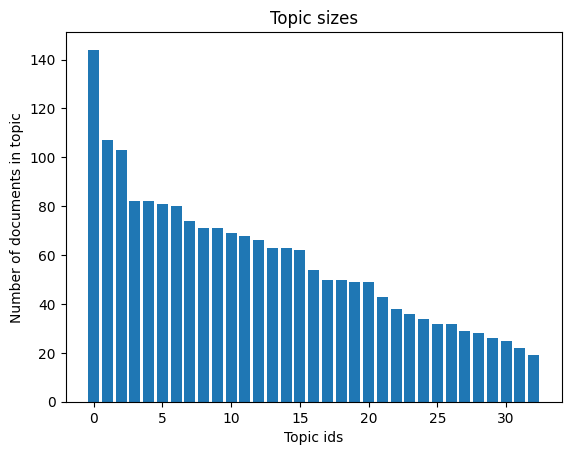

In [316]:
plt.bar(topic_nums, topic_sizes)
plt.xlabel('Topic ids')
plt.ylabel('Number of documents in topic')
plt.title('Topic sizes')

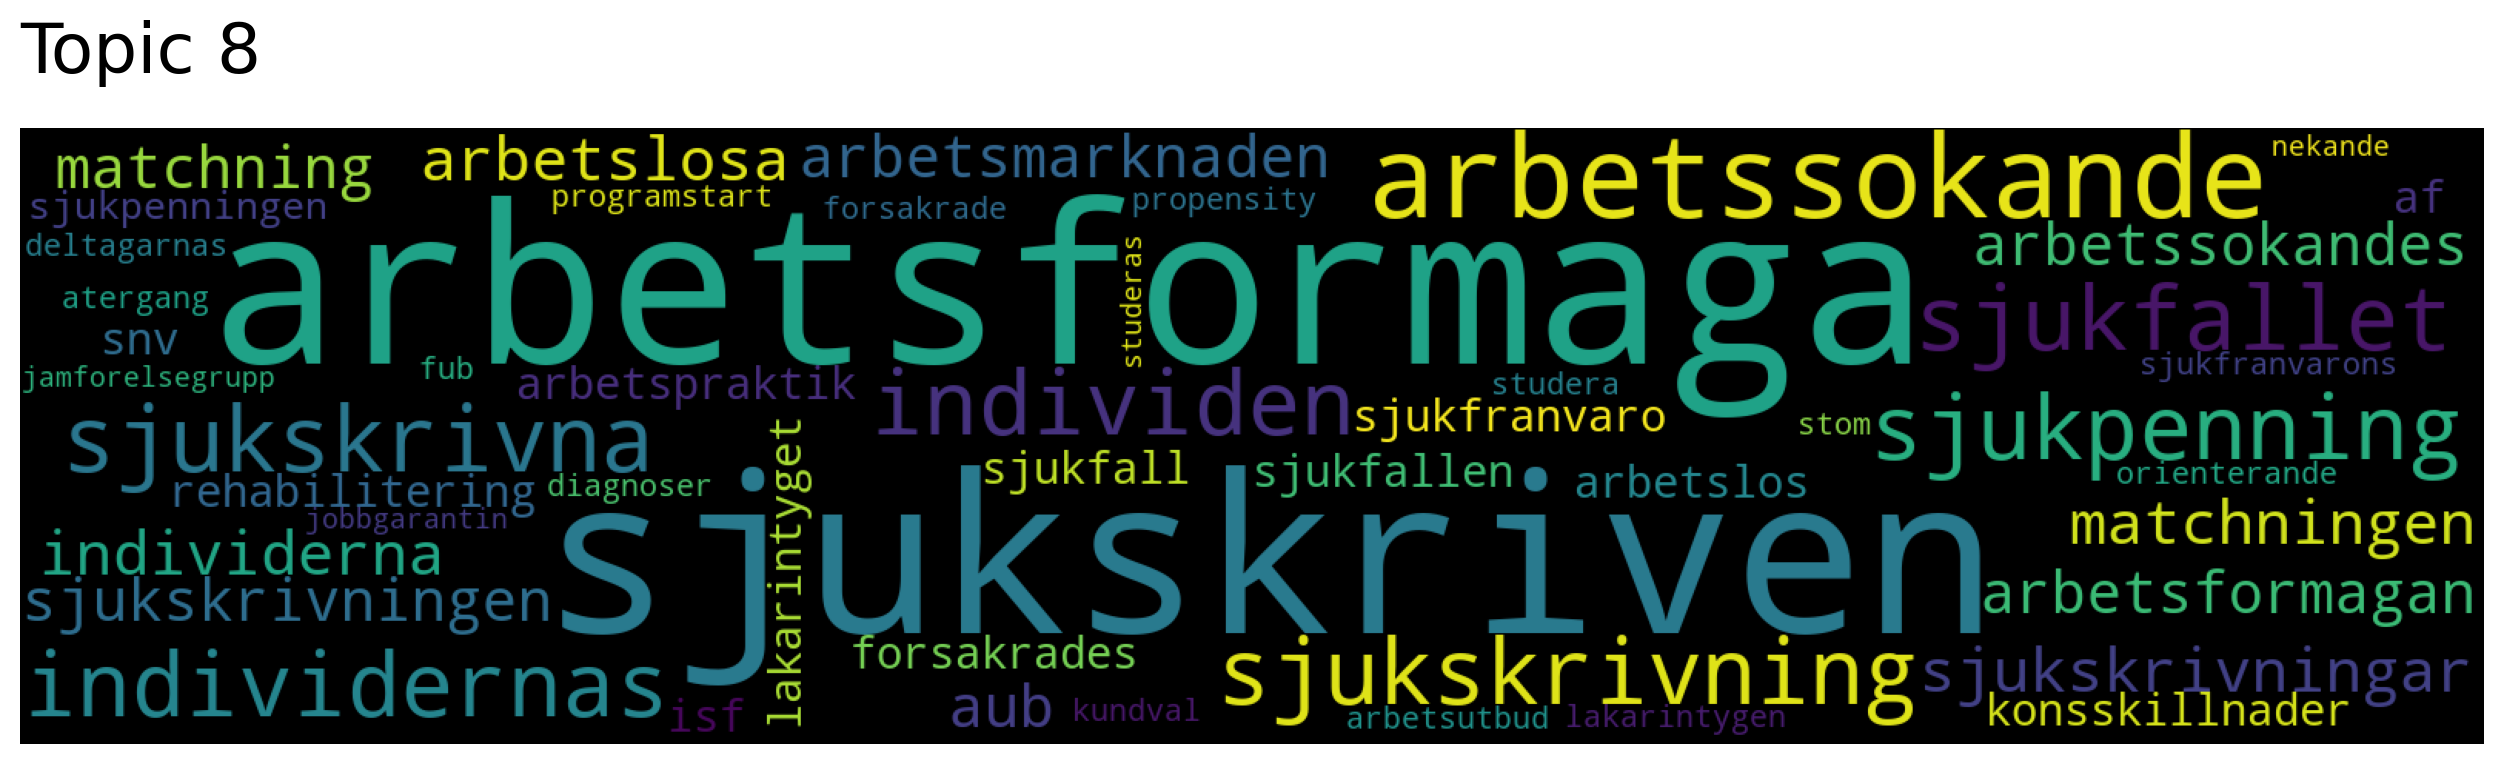

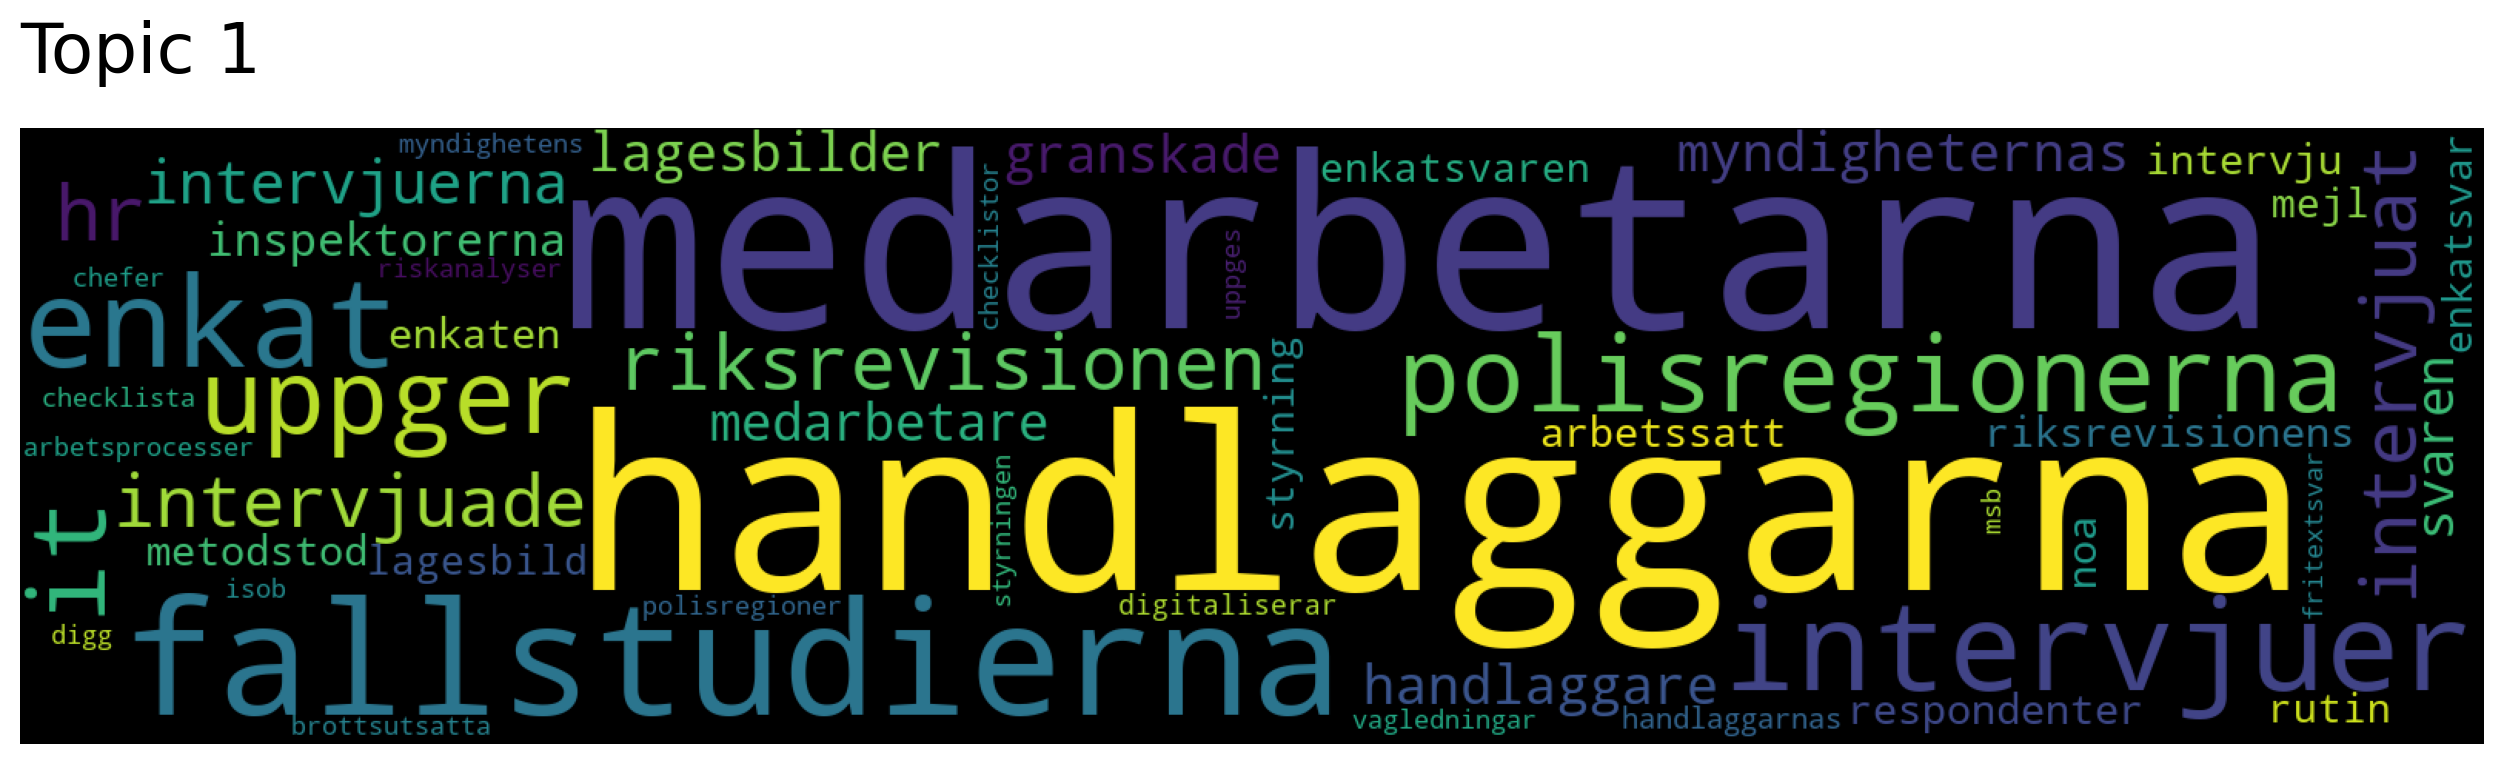

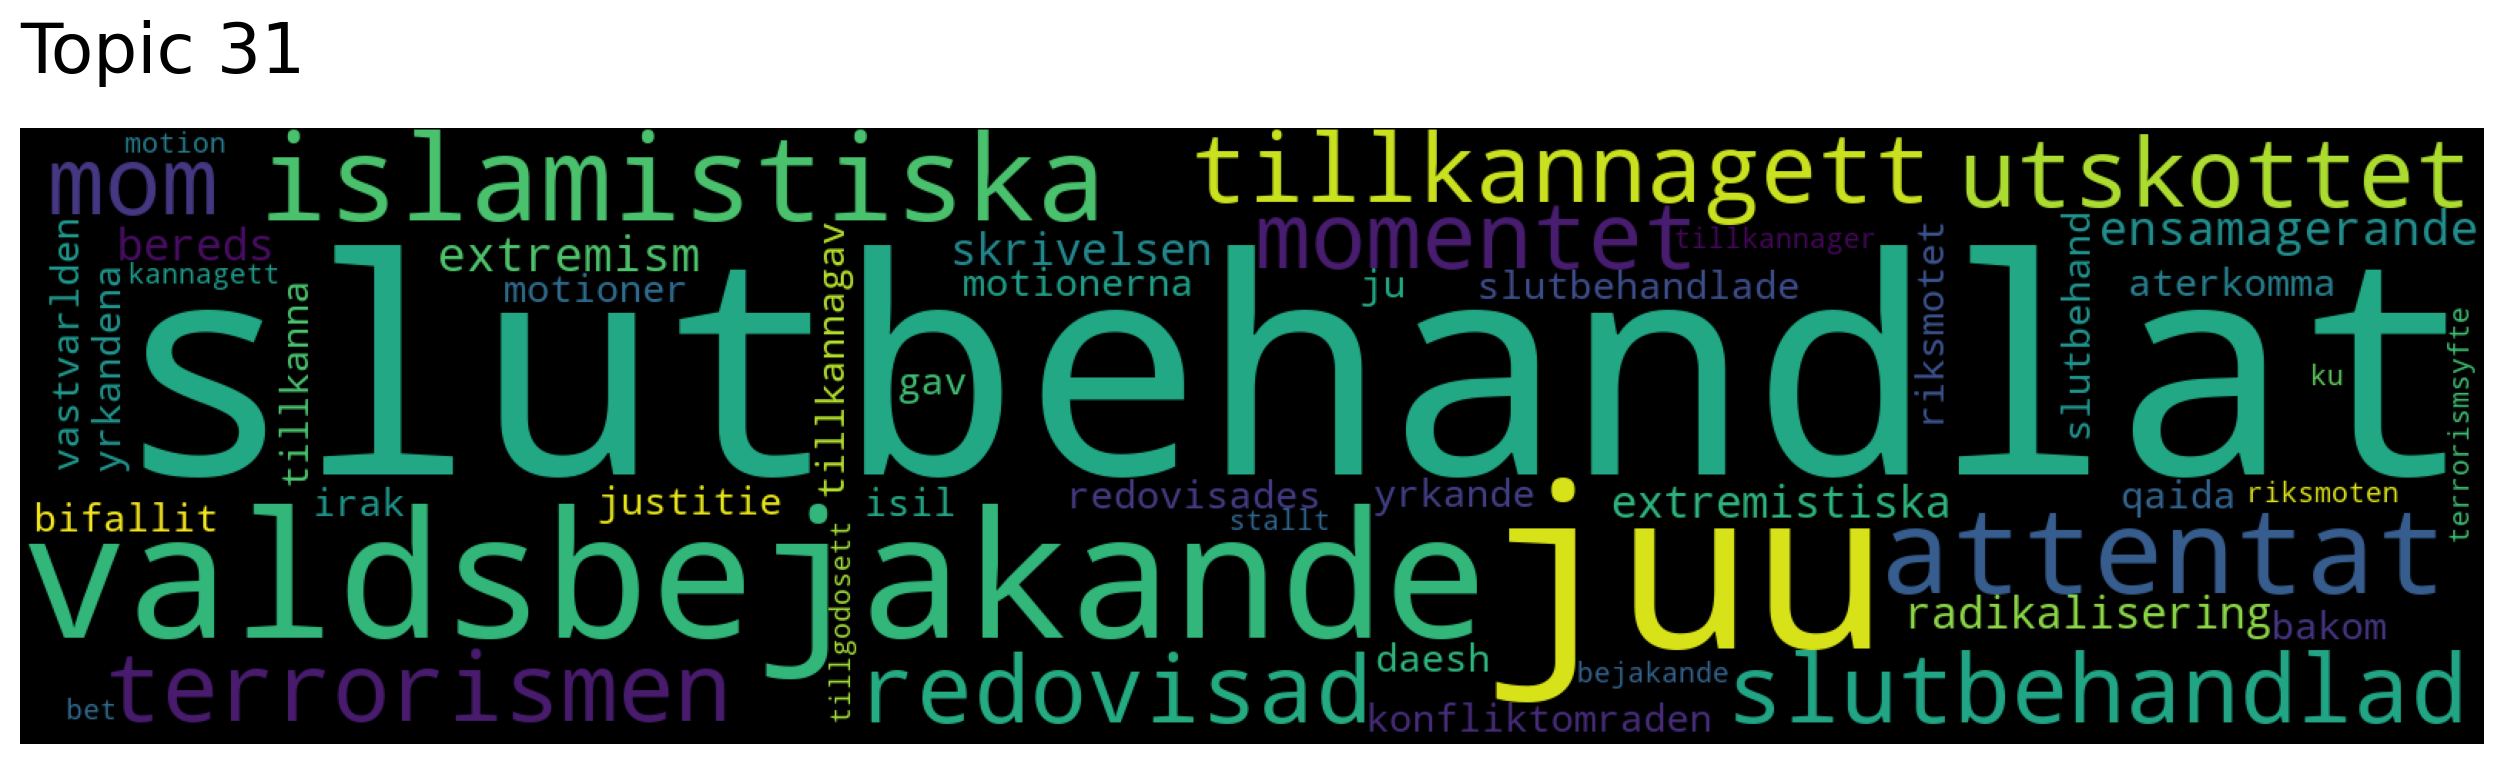

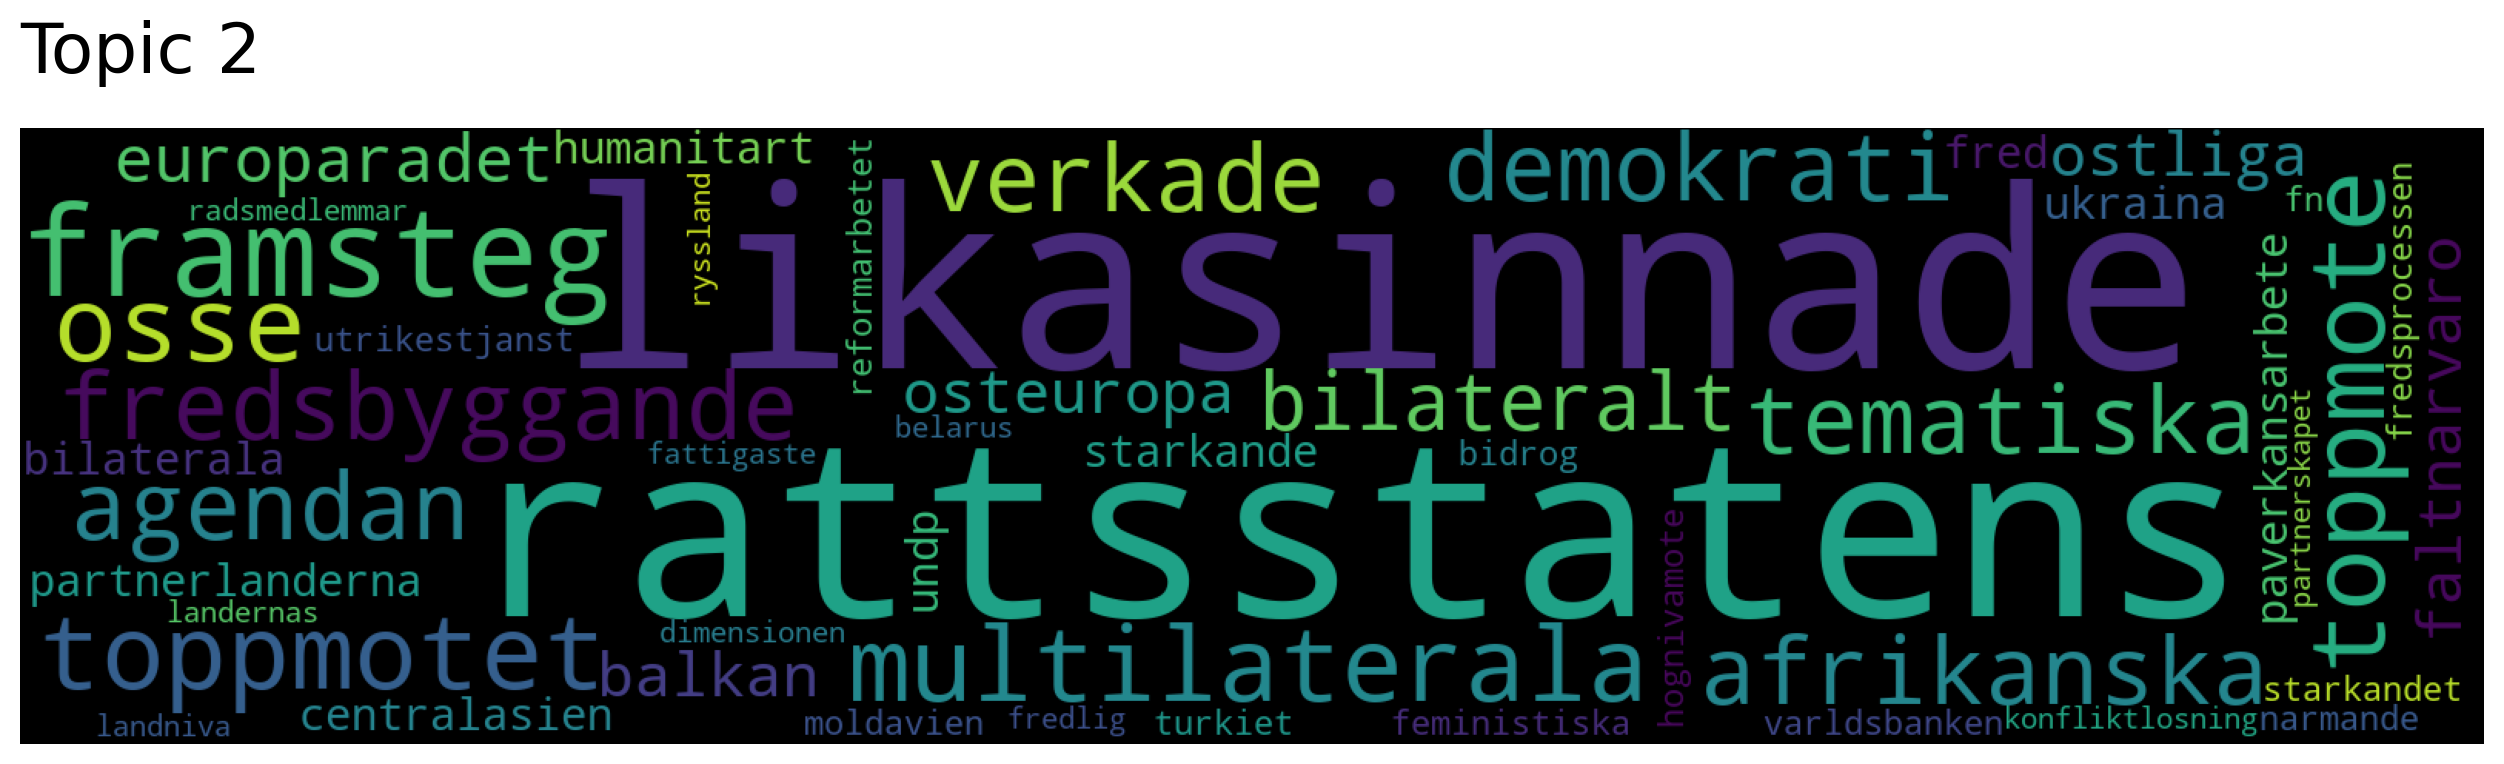

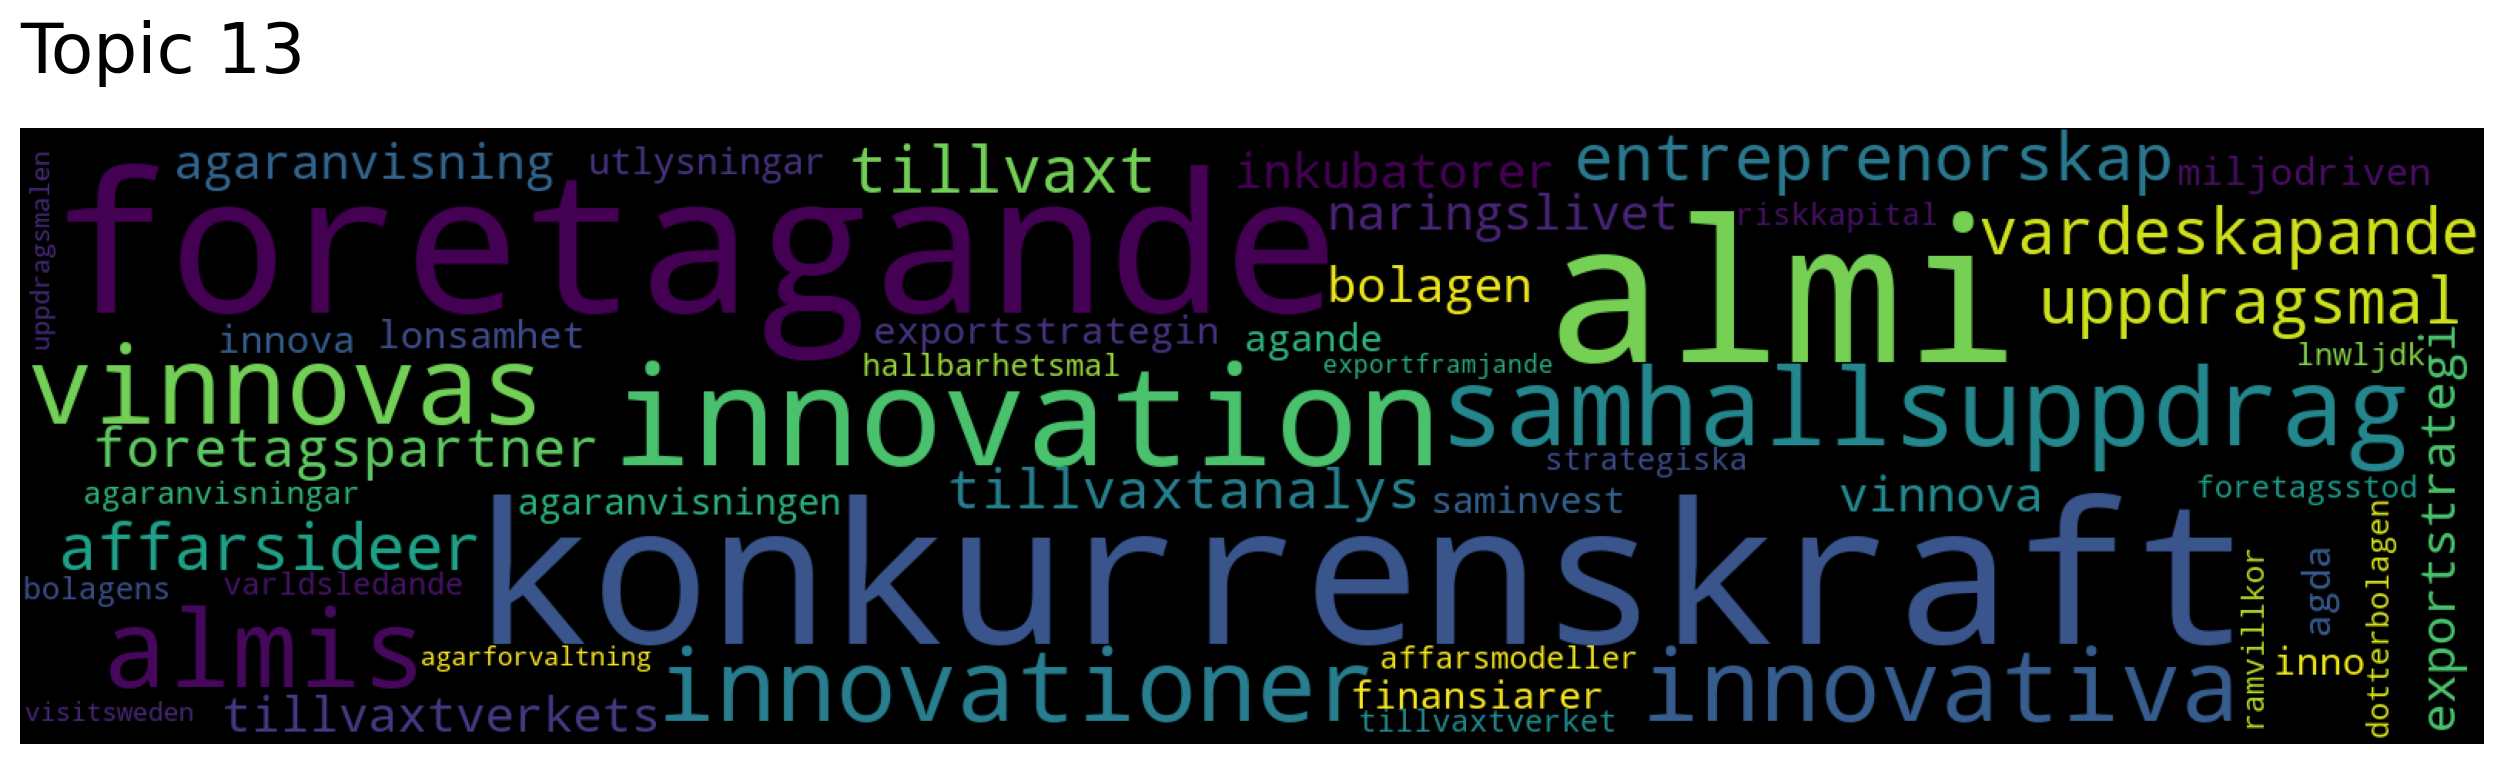

In [322]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["arbete"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [ ]:
model.search_documents_by_vector(ve,5)

In [334]:
model.topic_vectors.shape

(33, 300)

In [329]:
# Topic 8 handlar om arbetsmarknad
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=8, num_docs=5)

for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

TypeError: only integer scalar arrays can be converted to a scalar index

In [321]:
print(topic_nums)
print(topic_scores)

[ 8  1 31  2 13]
[0.41595694 0.32821879 0.24730255 0.23609923 0.21023028]


In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["medicine"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [297]:
test=documents[:100]


In [342]:
modelt = Top2Vec(test, document_chunker='sequential',document_ids=[p.stem for p in pathlist[:100]], embedding_model_path='models')

2022-11-21 11:49:17,506 - top2vec - INFO - Pre-processing documents for training
2022-11-21 11:49:35,955 - top2vec - INFO - Creating joint document/word embedding
2022-11-21 11:58:25,225 - top2vec - INFO - Creating lower dimension embedding of documents
2022-11-21 11:58:29,475 - top2vec - INFO - Finding dense areas of documents
2022-11-21 11:58:29,492 - top2vec - INFO - Finding topics


In [343]:
for scores, ids in zip(*modelt.search_documents_by_vector(model.document_vectors[0],num_docs=5,return_documents=False)):
    print(scores, ids)

0.09965562 H2031d23
0.09403272 H2031d21
0.091296315 h2031320
0.07905547 h203132
0.07821235 H2031d25


In [331]:
documents, document_scores, document_ids = modelt.search_documents_by_topic(topic_num=0, num_docs=3)

In [332]:
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 44, Score: 0.5088986754417419
-----------
﻿Regeringens proposition 2014/15:136

Gäldenärens möjligheter att överklaga

Prop.

utmätningsbeslut

2014/15:136

Regeringen överlämnar denna proposition till riksdagen.
Stockholm den 25 juni 2015
Margot Wallström
Morgan Johansson
(Justitiedepartementet)
Propositionens huvudsakliga innehåll
Regeringen föreslår en ändring av reglerna i utsökningsbalken om tiden för att överklaga vissa beslut i mål om utmätning. Genom förslaget säkerställs att gäldenären alltid kan få en domstolsprövning av sitt över- klagande av utmätningsbeslutet. Genom detta sker en anpassning till Europakonventionen.
Lagändringarna föreslås träda i kraft den 1 januari 2016.
1
Prop. 2014/15:136
2

Innehållsförteckning

1

Förslag till riksdagsbeslut .................................................................

3

2

Förslag till lag om ändring i utsökningsbalken .................................

4

3

Ärendet och dess beredning ................................